# Tensores

- Os tensores são matrizes multidimensionais, que podem ser armazenadas na GPU para acelerar o cálculo.
- é a principal estrutura de dados do PyTorch e de outros frameworks de Deep Learning.
- As entradas, saidas e transformações são representadas por tensores.
- Por convenção, nos frameworks de ML, chamaos as estruturas pelo nome de tensores, mesmo que não sejam matrizes, ou seja, independente da dimensão.

In [124]:
import torch
lista = [[1,2,3],
         [4,5,6]]

### Convertendo listas para tensores

In [125]:
tns = torch.FloatTensor(lista)
print('Dtype:',tns.dtype)

Dtype: torch.float32


- Existem diversos tipos de tensores, mas o mais comum é o tensor de ponto flutuante (float tensor).

### Outras formas de instanciar tensores

In [126]:
import numpy as np
# a partir de numpy arrays
arr = np.random.rand(3,4)
tns = torch.from_numpy(arr)
tns.dtype

torch.float64

# Tensores inicializados 
Essas funções recebem como parametro o tamanho de cada dimensão do tensor.

- torch.zeros(dimensões) - tensor preenchido com zeros
- torch.ones(dimensões) - tensor preenchido com uns
- torch.rand(dimensões) - tensor preenchido com números aleatórios

In [127]:
tns1 = torch.ones(2,3)
tns0 = torch.zeros(4,5)
tnsr = torch.randn(3,3)

print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[ 0.2534,  0.8443, -1.0360],
        [ 0.4497,  0.4556,  0.4728],
        [-0.1517, -0.1601, -0.2701]])


### Tensor para numpy array

Caso queira converter um tensor para um numpy array, basta utilizar o método .numpy() 

In [128]:
arr = tnsr.data.numpy()
print(arr.dtype)

float32


# Operações com tensores

- Podemos realizar operações com tensores, como soma, multiplicação, etc.

- Essas operações são realizadas elemento a elemento, ou seja, o primeiro elemento do primeiro tensor é somado com o primeiro elemento do segundo tensor, e assim por diante.

- A função .item() retorna o valor do tensor como um número python.

In [129]:
tnsr2 = torch.randn(3,3)
tnsr3 = torch.randn(3,3)
print(tnsr2 / tnsr3)

tensor([[-0.7747,  1.0701, -0.9267],
        [ 0.3894, -0.0820,  1.8677],
        [ 0.6571,  4.5468, -0.7924]])


### Função .size() e .view()

- A função .size() retorna o tamanho de cada dimensão do tensor.

- A função .view() retorna um novo tensor com as mesmas dimensões do tensor original, porém com a forma especificada.

In [130]:
tnsr_3d = torch.randn(2,2,3)

print(tnsr2.size())

# redimensionando nosso tensor com a função .view()
tnsr_3d = tnsr_3d.view(12) # passando -1 iremos achatar o tensor
tnsr_3d.size()

torch.Size([3, 3])


torch.Size([12])

# GPU Cast

In [131]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

# para jogar a seu tensor na gpu/cpu, voce pode fazer assim:

tns = tns.to(device)
print(tns)

cpu
tensor([[0.3745, 0.9507, 0.7320, 0.5987],
        [0.1560, 0.1560, 0.0581, 0.8662],
        [0.6011, 0.7081, 0.0206, 0.9699]], dtype=torch.float64)


# Classificação Linear

#### Equação da reta

- A equação da reta é dada por ax +by + c, onde m é a inclinação da reta e b é o intercepto.
- Para adequarmos esta formulas às redes neurais, iremos reescrever a equação da reta como y = Wx + b, onde W é a matriz de pesos e b é o bias/viés.

vamos plotar uma reta especifica para a seguinte equação: -1X_1 + 4X_2 + 0.4

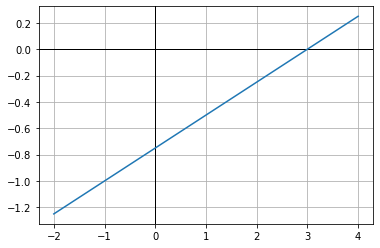

In [132]:
import numpy as np
import matplotlib.pyplot as plt



a = -1
b = 4
c = 3



def plot_line(a,b,c):

    x = np.linspace(-2,4,50)

    y = (-a*x - c)/b

    plt.axvline(0,-1,1, color='k', linewidth =1)
    plt.axhline(0,-2,4, color='k', linewidth =1)

    plt.plot(x,y)
    plt.grid(True)

plot_line(a,b,c)

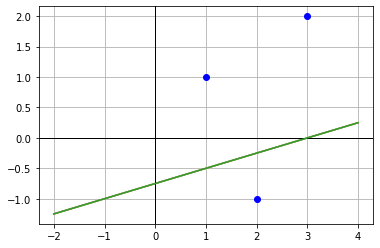

In [133]:
p1 = (2, -1)
ret1 = a * p1[0] + b * p1[1] + c
plot_line(a,b,c)
plt.plot(p1[0],p1[1], color='b', marker='o')

p2 = (1, 1)
ret2 = a * p2[0] + b * p2[1] + c
plot_line(a,b,c)
plt.plot(p2[0],p2[1], color='b', marker='o')

p3 = (3, 2)
ret3 = a * p3[0] + b * p3[1] + c
plot_line(a,b,c)
plt.plot(p3[0],p3[1], color='b', marker='o')

### Modelo Linear

- Nossa reta pode ser interpretado como um modelo linear, que nada mais é do que uma função que recebe um conjunto de entradas e retorna um conjunto de saídas.

- Para problemas de classificação, os valores de y para novas entradas x vao definir se x pertence a uma classe ou  vendo se o ponto se encontra abaixo ou acima da reta.

- No caso do problema de classificação, a reta é chamada de hiperplano de decisão. sao compostos por:

1. um peso para cada entrada, ou seja, um peso para cada dimensão do nosso conjunto de dados.

2. um bias, que é um valor escalar que é adicionado ao resultado da multiplicação dos pesos e das entradas.

#### Exemplo para 3 dimensoes

- entradas = x1,x1,x3
- pesos = w1,w2,w3
- bias = b

y = w1x1 + w2x2 + w3x3 + b

- de forma geral, define-se que dada uma entrada com d dimensões, a função de mapeamento de um modelo linear é dada por:

y = Wx + b

# Exemplo de classificação linear

In [134]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

X1,y1 = make_classification(n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1)

(100, 2) (100,)


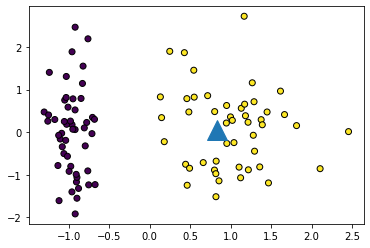

In [135]:
print(X1.shape,y1.shape)
np.random.seed(42)
plt.scatter(X1[:,0],X1[:,1], marker='o', c=y1, edgecolors='k')

# plotando um numero e vendo a classificação dele
p = X1[10]
plt.plot(p[0],p[1], marker = "^", markersize=20)

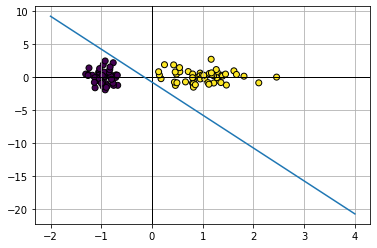

In [136]:
def plot_model(w1,w2,b):
    x = np.linspace(-2,4,50)

    y = (-w1*x - b)/w2

    plt.axvline(0,-1,1, color='k', linewidth =1)
    plt.axhline(0,-2,4, color='k', linewidth =1)
    
    plt.plot(x,y)
    plt.grid(True)
    plt.scatter(X1[:,0],X1[:,1], marker='o', c=y1, edgecolors='k')



w1 = 20
w2 = 4
b= 3 # onde a reta cruza o eixo x
plot_model(w1,w2,b)


In [137]:
p1 = (-1,1)
print(w1 * p1[0] + w2 * p1[1] + b)
# valores negativos em reação à reta sao da classe roxa

p2 = (5,14)
print(w1 * p2[0] + w2 * p2[1] + b)
# valores positivos em relação à reta sao da classe amarela

-13
159


### Função que ajusta a nossa reta a esses dados de classificação
y = 20 * X + 4 * X + 3

# Função que classifica um ponto em uma das classes

In [138]:
def classify(p):
    plt.plot(p[0],p[1], marker = "o", markersize=10)
    plt.scatter(X1[:,0],X1[:,1], marker='o', c=y1, edgecolors='k')
    plot_line(w1,w2,b)
    if w1 * p[0] + w2 * p[1] + b >= 0:
        return 1, "amarelo"
    else:
        
        return 0, "roxo"

1 amarelo


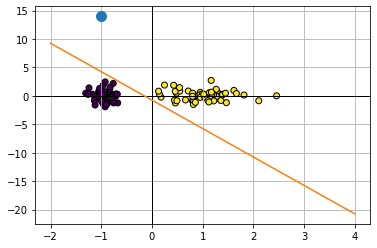

In [139]:
classe,cor = classify((-1,14))
print(classe, cor)

Acurcia: 100.0%


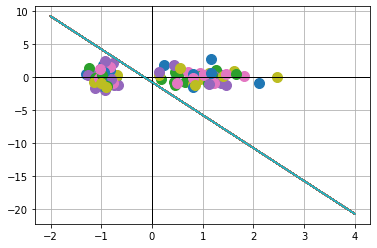

In [140]:
acertos = 0
for i in range(len(X1)):
    categ,_=classify(X1[i])
    if categ == y1[i]:
        acertos+=1

print(f'Acurcia: {(acertos/len(X1))*100}%')